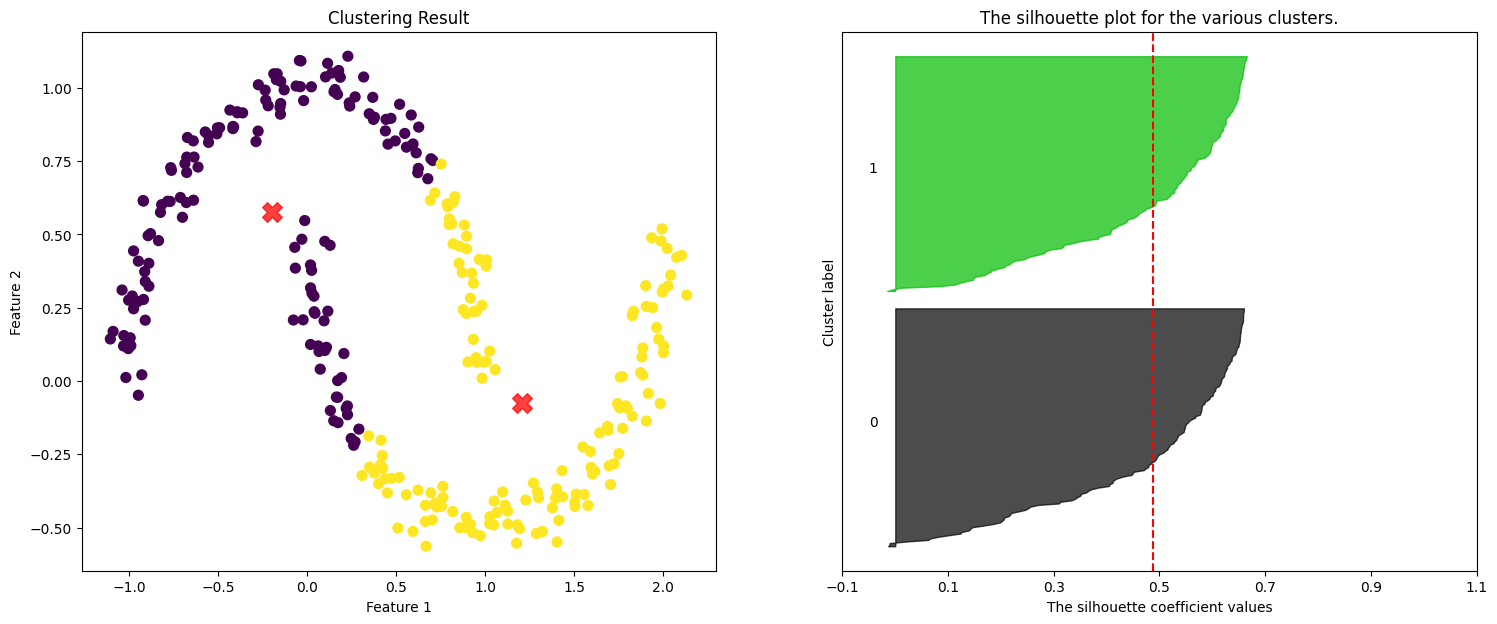

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

def plot_clustering_results(X, labels, centers, silhouette_avg, n_clusters=2):
    """
    Plots the clustering results and silhouette scores for a given dataset.
    
    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input dataset.
    labels : array-like, shape (n_samples,)
        Cluster labels assigned to each data point.
    centers : array-like, shape (n_clusters, n_features)
        Coordinates of cluster centers.
    silhouette_avg : float
        The average silhouette score for the clustering.
    n_clusters : int, optional (default=2)
        The number of clusters.
    """
    # Create a figure with two subplots: one for the clusters and one for the silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Scatter plot of clustered data points
    ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    
    # Plot cluster centers if provided
    if centers is not None:
        ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Clustering Result')

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10 # Starting position for the silhouette plot
    for i in range(n_clusters):
        # Extracting silhouette scores for the current cluster and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i # Define upper boundary for the current cluster
        # Assign a color for the cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        # Fill the silhouette plot for the current cluster
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label cluster number in the plot
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Update lower boundary for the next cluster
        y_lower = y_upper + 10
# Set up silhouette plot labels and aesthetics
    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")
    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()


# Generate synthetic dataset using the make_moons function
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_moons)

# Compute the average silhouette score for the clustering
silhouette_avg = silhouette_score(X_moons, labels)

# Plot the clustering results and silhouette scores
plot_clustering_results(X_moons, labels, kmeans.cluster_centers_, silhouette_avg, n_clusters=2)
                                  
                                  

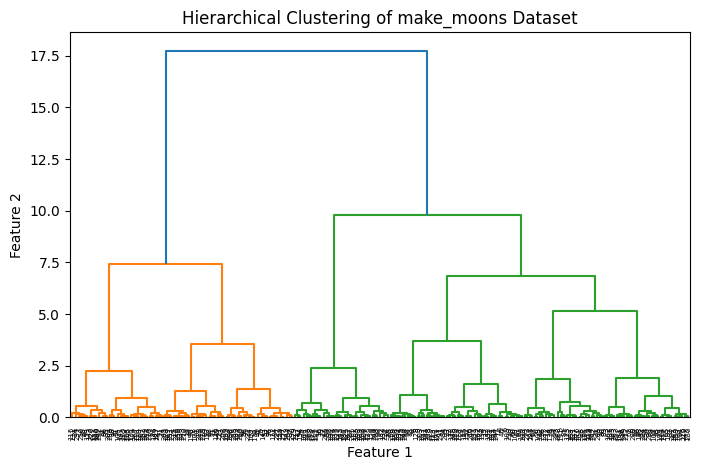

Silhouette Score: 0.44073316355526565


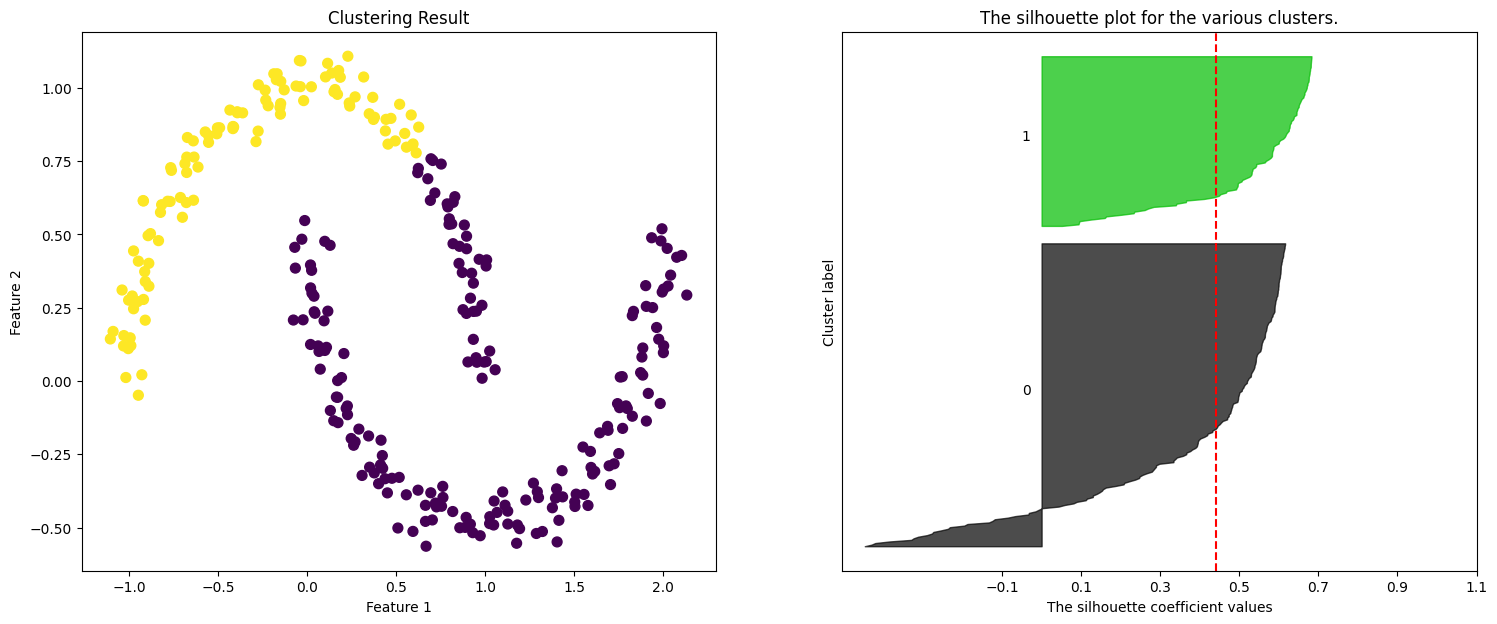

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic dataset using the make_moons function
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Perform hierarchical clustering 
Z = linkage(X, 'ward')

# Plot the dendrogram for hierarchical clustering
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering of make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Apply Agglomerative Clustering with 2 clusters
agg_clustering = AgglomerativeClustering(n_clusters=2)
y_agg = agg_clustering.fit_predict(X)

# Compute the average silhouette score for the hierarchical clustering result
silhouette_avg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results and silhouette scores for hierarchical clustering
plot_clustering_results(X, y_agg, None, silhouette_avg, n_clusters=2)


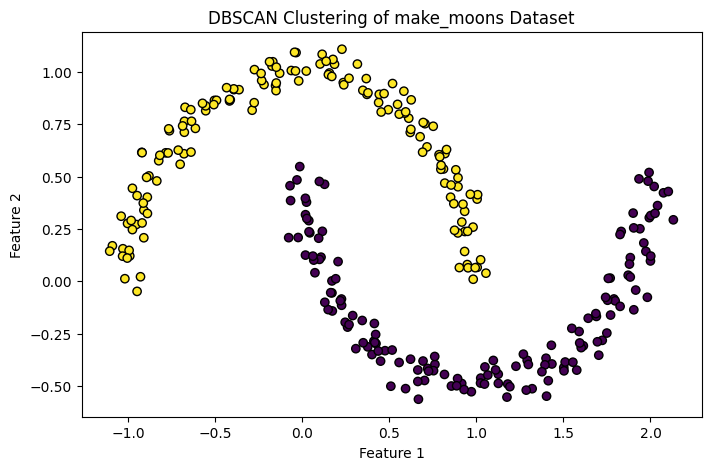

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN clustering
# DBSCAN is a density-based clustering algorithm that identifies clusters of varying shapes
# eps (epsilon) is the maximum distance between two samples for them to be considered as neighbors
# min_samples is the minimum number of samples required to form a dense region

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot of DBSCAN clustering results
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering of make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Make_blobs dataset : k-means

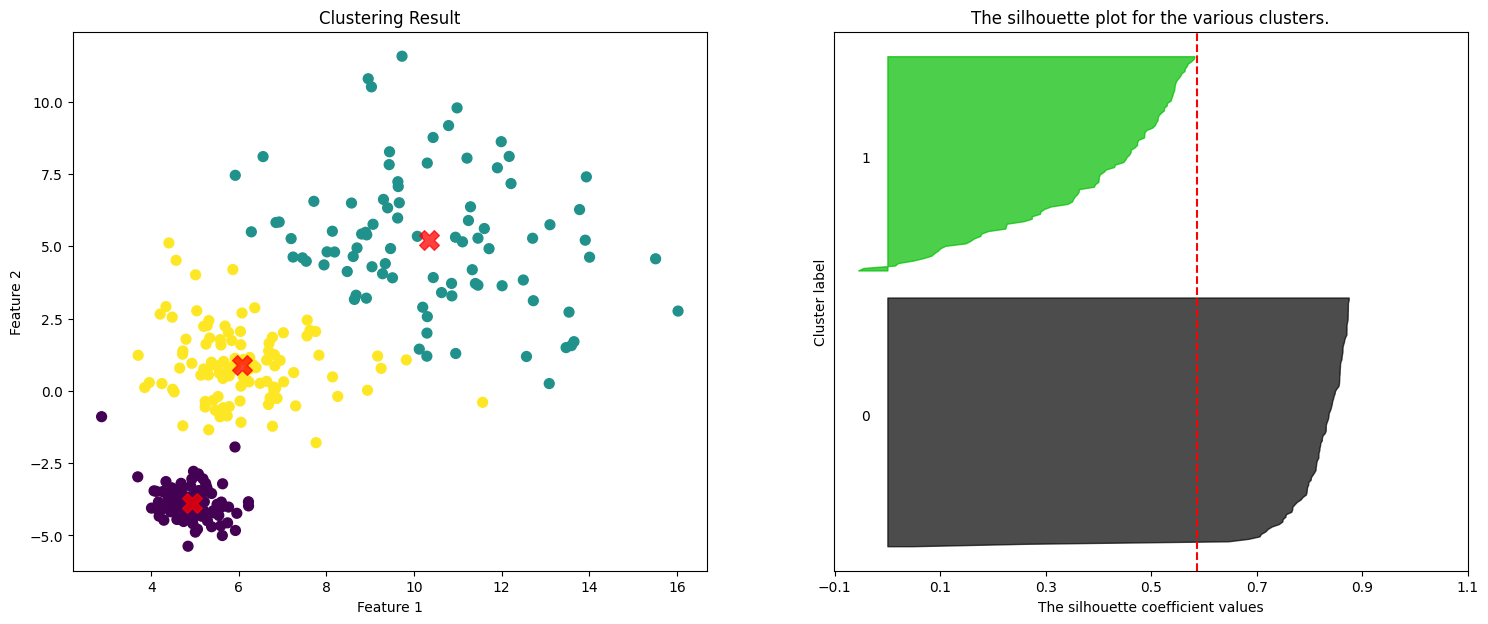

In [13]:
def plot_clustering_results(X, labels, centers, silhouette_avg, n_clusters=3):
    """
    Plots the clustering results and silhouette scores for a given dataset.
    
    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input dataset.
    labels : array-like, shape (n_samples,)
        Cluster labels assigned to each data point.
    centers : array-like, shape (n_clusters, n_features)
        Coordinates of cluster centers (if applicable, otherwise None).
    silhouette_avg : float
        The average silhouette score for the clustering.
    n_clusters : int, optional (default=3)
        The number of clusters.
    """
    # Create a figure with two subplots: one for the clusters and one for the silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Scatter plot of clustered data points
    ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    
    # Plot cluster centers if provided
    if centers is not None:
        ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Clustering Result')

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10 # Starting position for the silhouette plot
    for i in range(n_clusters):
        # Extract silhouette scores for the current cluster and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[np.where(labels == i)]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i # Define upper boundary for the current cluster
# Assign a color for the cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        # Fill the silhouette plot for the current cluster
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label cluster number in the plot
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Update lower boundary for the next cluster
        y_lower = y_upper + 10
# Set up silhouette plot labels and aesthetics
    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")
    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

# Generate synthetic dataset using the make_blobs function
# This dataset consists of 3 clusters with different standard deviations
X_makeblobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])

# Apply K-Means clustering with 3 clusters
# K-Means is a centroid-based clustering algorithm that partitions data into k clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_makeblobs)

# Compute the average silhouette score for K-Means clustering
silhouette_avg = silhouette_score(X_makeblobs, labels)

# Plot the clustering results and silhouette scores for K-Means
plot_clustering_results(X_makeblobs, labels, kmeans.cluster_centers_, silhouette_avg, n_clusters=2)
                                  
                      

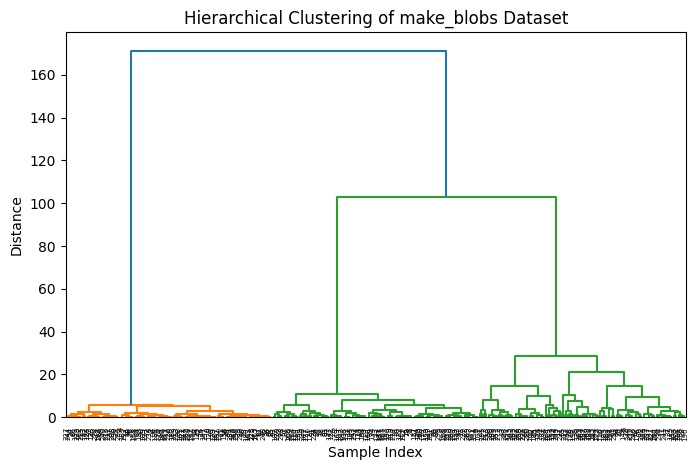

Silhouette Score: 0.7829608619633761


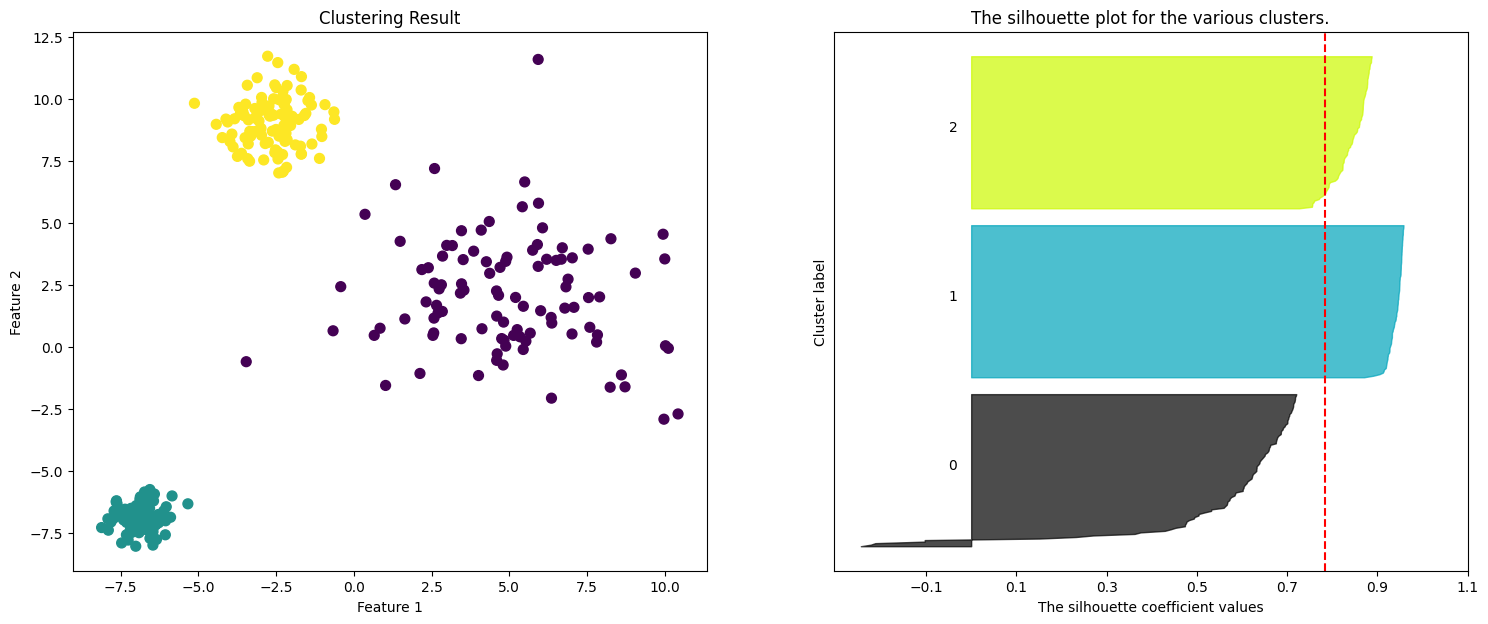

In [12]:
# Generate synthetic dataset using the make_blobs function
# This dataset consists of 3 clusters with different standard deviations
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Perform hierarchical clustering using Ward's method
# Ward's method minimizes the variance between clusters as they are merged
Z = linkage(X, 'ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering of make_blobs Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering with 3 clusters
# This method merges data points into hierarchical clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X)

# Compute the average silhouette score for hierarchical clustering
silhouette_avg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results and silhouette scores for hierarchical clustering
plot_clustering_results(X, y_agg, None, silhouette_avg, n_clusters=3)


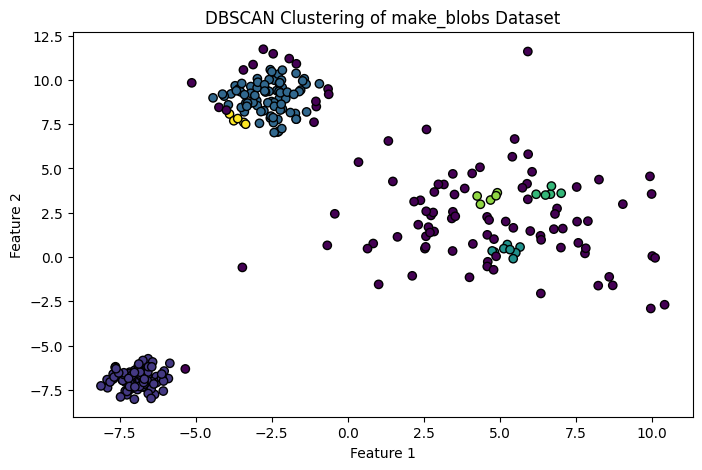

In [ ]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5) 
labels = dbscan.fit_predict(X)

# Scatter plot of DBSCAN clustering results
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering of make_blobs Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()